---
---

# Introducción aprendizaje no supervisado

## Preliminares

Los algoritmos estudiados anteriormente requieren de un conjunto de datos del que dispongamos información *a priori* en forma de etiquetas, lo que también hemos denominado variable respuesta. Sin embargo, esta circunstancia responde a una realidad completamente excepcional, ya que la inmensa mayoría de los datos de los que podemos disponer no están clasificados del modo que tenemos entendido hasta ahora, especialmente si haemos uso de fuentes de datos como texto, imágenes, audio o vídeo.

En el extremo radicalmente opuesto a lo que conocemos está el **aprendizaje no supervisado**, en el que nuestro objetivo es encontrar patrones que asocien distintos elementos de una muestra. Existe también un amplia área de investigación intermedia que es muy aplicada a la par de que diversa, conocida como **aprendizaje semisupervisado**, pero que no veremos por limitaciones de tiempo. Para más información de este último punto, puede recurrir a esta excelente [referencia](https://lilianweng.github.io/posts/2021-12-05-semi-supervised/) que recorre el camino de este campo desde los orígenes hasta el estado del arte.

Dentro del aprendizje no supervisado, encontramos:

* *Exclusive/Overlapping clustering*: Gama de algoritmos que estipulan que cada punto puede únicamente pertenecer a un grupo o *cluster*. También es conocido como *hard clustering*.
* *Hierarchical clustering*: Puede ser categorizado en agregativo o divisivo. El primero toma todos los puntos como grupos individuales y progresivamente los va uniendo hasta llegar a un único nodo, y el divisivo hace precisamente lo contrario. La forma de unión o división de esos *clusters* se realiza mediante métricas de similitud, siendo una de las más populares la de [Ward](https://www.statistics.com/glossary/wards-linkage/).
* *Probabilistic clustering*: Asigna a cada punto una probabilidad de pertenecer a cada uno de los posibles grupos. Es conocido también por *soft clustering*.

Estudiaremos un algoritmo de cada grupo, incluyendo además una implementación manual del más sencillo de todos ellos, para que se adquiera un conocimiento más profundo del funcionamiento de los mismos.

## *Exclusive clustering*: K-Means

El algoritmo *K-Means* es sin duda el más popular dentro de esta categoría, por su simplicidad y efectividad. Veremos por tanto en detenimiento cómo funciona para tener un mayor conocimiento del mismo. Consta de los siguientes pasos:

1. Inicializamos tantos *centroides* como deseemos eligiendo puntos aleatorios de nuestros datos. Estos puntos serán el **centro de masa** de nuestros *clusters*.
2.  Asignamos cada uno de los puntos restantes al centroide más cercano.
3. Recalculamos el centroide de cada *cluster* haciendo la media de los puntos que conforman cada *cluster*.
4. Repetimos los pasos 2) y 3) hasta que en una iteración no varíen los centroides, o hasta que decidamos parar el funcionamiento del bucle.

Naturalmente, el primer punto del algoritmo puede ser crítico para garantizar la convergencia del algoritmo, y existen formas más óptimas de elegir los centroides, como veremos en los ejercicios. Además, en el paso 3) del algoritmo podríamos dar una *importancia* distinta a cada uno de los puntos (i.e., una ponderación), lo cual hace que nos acerquemos a esa noción de centro de masa, que también dejaremos para los ejercicios.

In [1]:
# Librerías
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

# Clase que contiene el algoritmo y funcionalidades extra
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        """Clase que contiene el algoritmo K-Means y funcionalidades
        adicionales. El método principal es "predict()", y "plot()" 
        sirve par agraficar los resultados, siendo el resto métodos
        auxiliares.

        Args:
            K (int, optional): Número de clusters. Defaults to 5.
            max_iters (int, optional): Número de iteraciones máximas. Defaults to 100.
            plot_steps (bool, optional): Dibujo en cada paso del análisis. Defaults to False.
        """
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # Lista para contener los índices de cada cluster
        self.clusters = [[] for _ in range(self.K)]
        # Lista de centroides
        self.centroids = []

    def predict(self, X):
        # Instanciamos en la clase algunos valores relevantes
        self.X = X
        self.n_samples, self.n_features = X.shape
        # Inicialización aleatoria de centroides
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Algoritmo
        for _ in range(self.max_iters):
            # Actualizamos clústeres
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Actualizamos centroides
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # Criterio de convergencia
            if self._is_converged(centroids_old, self.centroids):
                break
            # Dibujamos la evolución en esta iteración
            if self.plot_steps:
                self.plot()
        # Devolvemos las etiquetas resultantes
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [self.euclidean_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(6,4))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker='x',color='black',linewidth=2)
        plt.show()

    @staticmethod
    def euclidean_distance(x1,x2):
        return np.sqrt(np.sum((x1 - x2)**2))

Veamos ahora con un sencillo ejemplo cómo funciona el algoritmo detalladamente:

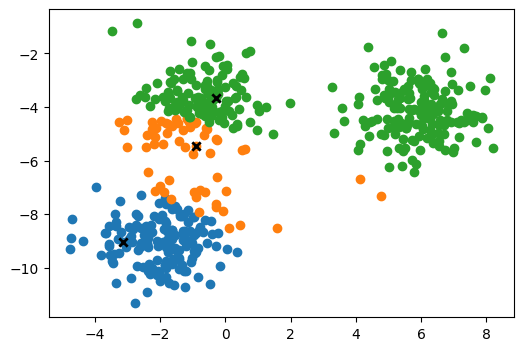

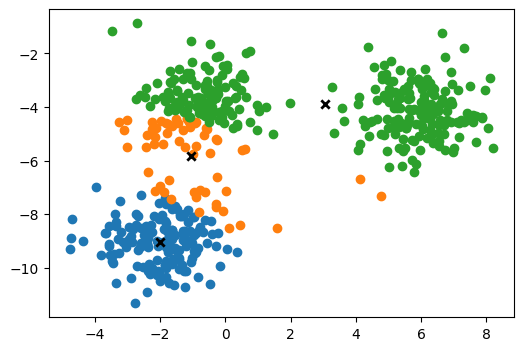

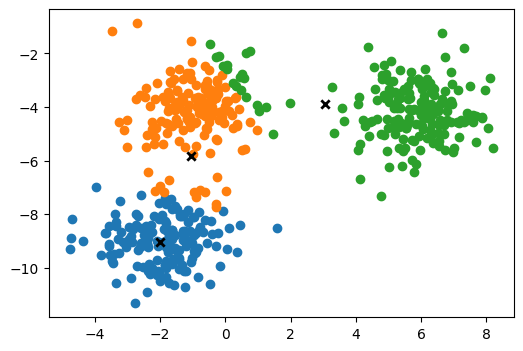

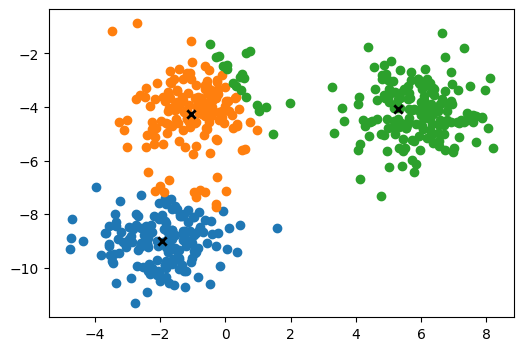

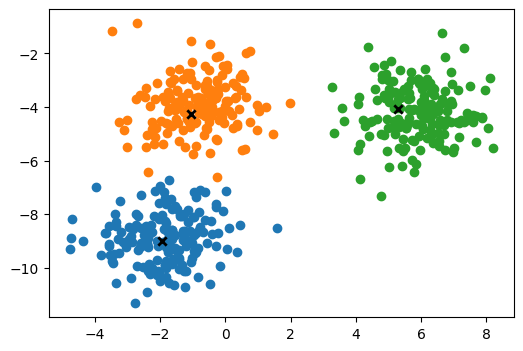

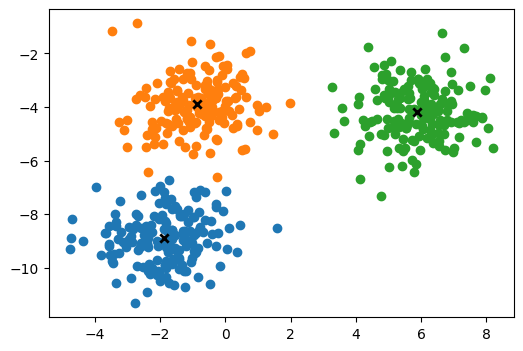

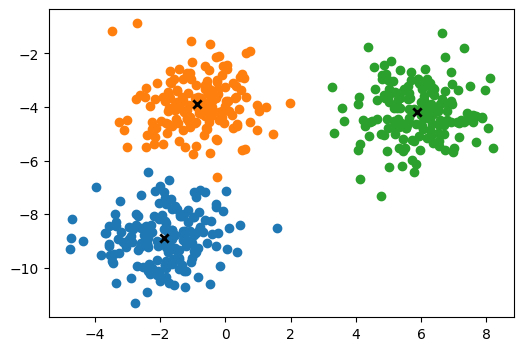

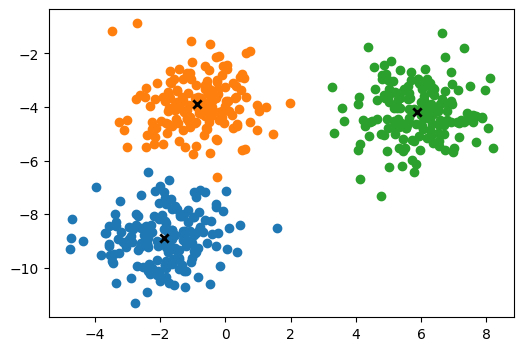

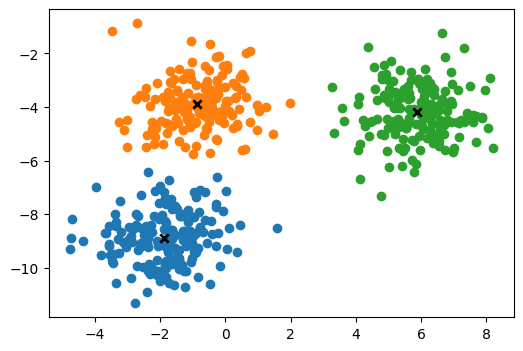

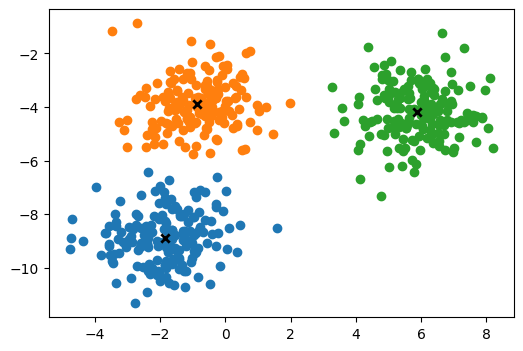

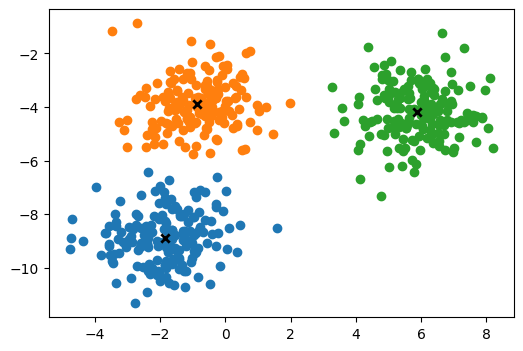

In [2]:
# Fijamos una semilla para la 
np.random.seed(42)
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
clusters = len(np.unique(y))
km = KMeans(K= clusters, max_iters=150, plot_steps=True)
y_pred = km.predict(X)

> *Ejercicio: ¿Cómo hubieras elegido tú los centroides al comienzo del algoritmo?*

## *Hierarchical clustering*: Agglomerative

La implementación original de `sklearn` de este algoritmo es lo suficientemente extensa como para estudiarla de forma independiente. Los parámetros que discutiremos son:
* `n_clusters`: Cantidad de grupos a generar. 
* `affinity`: Métrica usada para estudiar la similitud. Puede ser `euclidean`, `l1`, `l2`, `manhattan` o `cosine`.

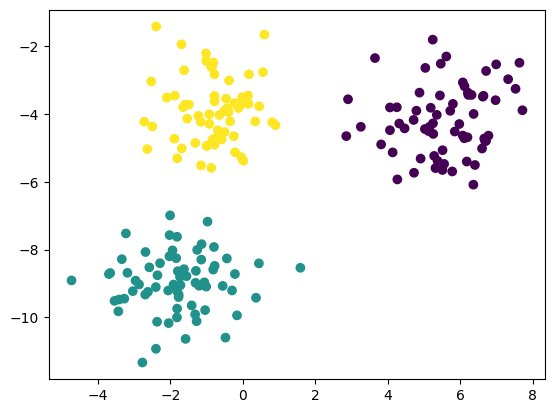

In [3]:
# Requerimientos
from sklearn.cluster import AgglomerativeClustering
# Creamos dataset
np.random.seed(42)
X, y = make_blobs(centers=3, n_samples=200, n_features=2, shuffle=True, random_state=40)
clusters = len(np.unique(y))
# Ejecutamos algoritmo
AHC = AgglomerativeClustering(n_clusters = clusters, affinity='euclidean', linkage='ward')
y = AHC.fit_predict(X)
# Dibujamos los resultados
plt.scatter(x=X[:,0], y=X[:,1], c=y)

Dibujemos ahor la evolución del algoritmo en forma de árboles de decisión:

C:\Users\User\AppData\Local\Temp\ipykernel_13912\2288190408.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


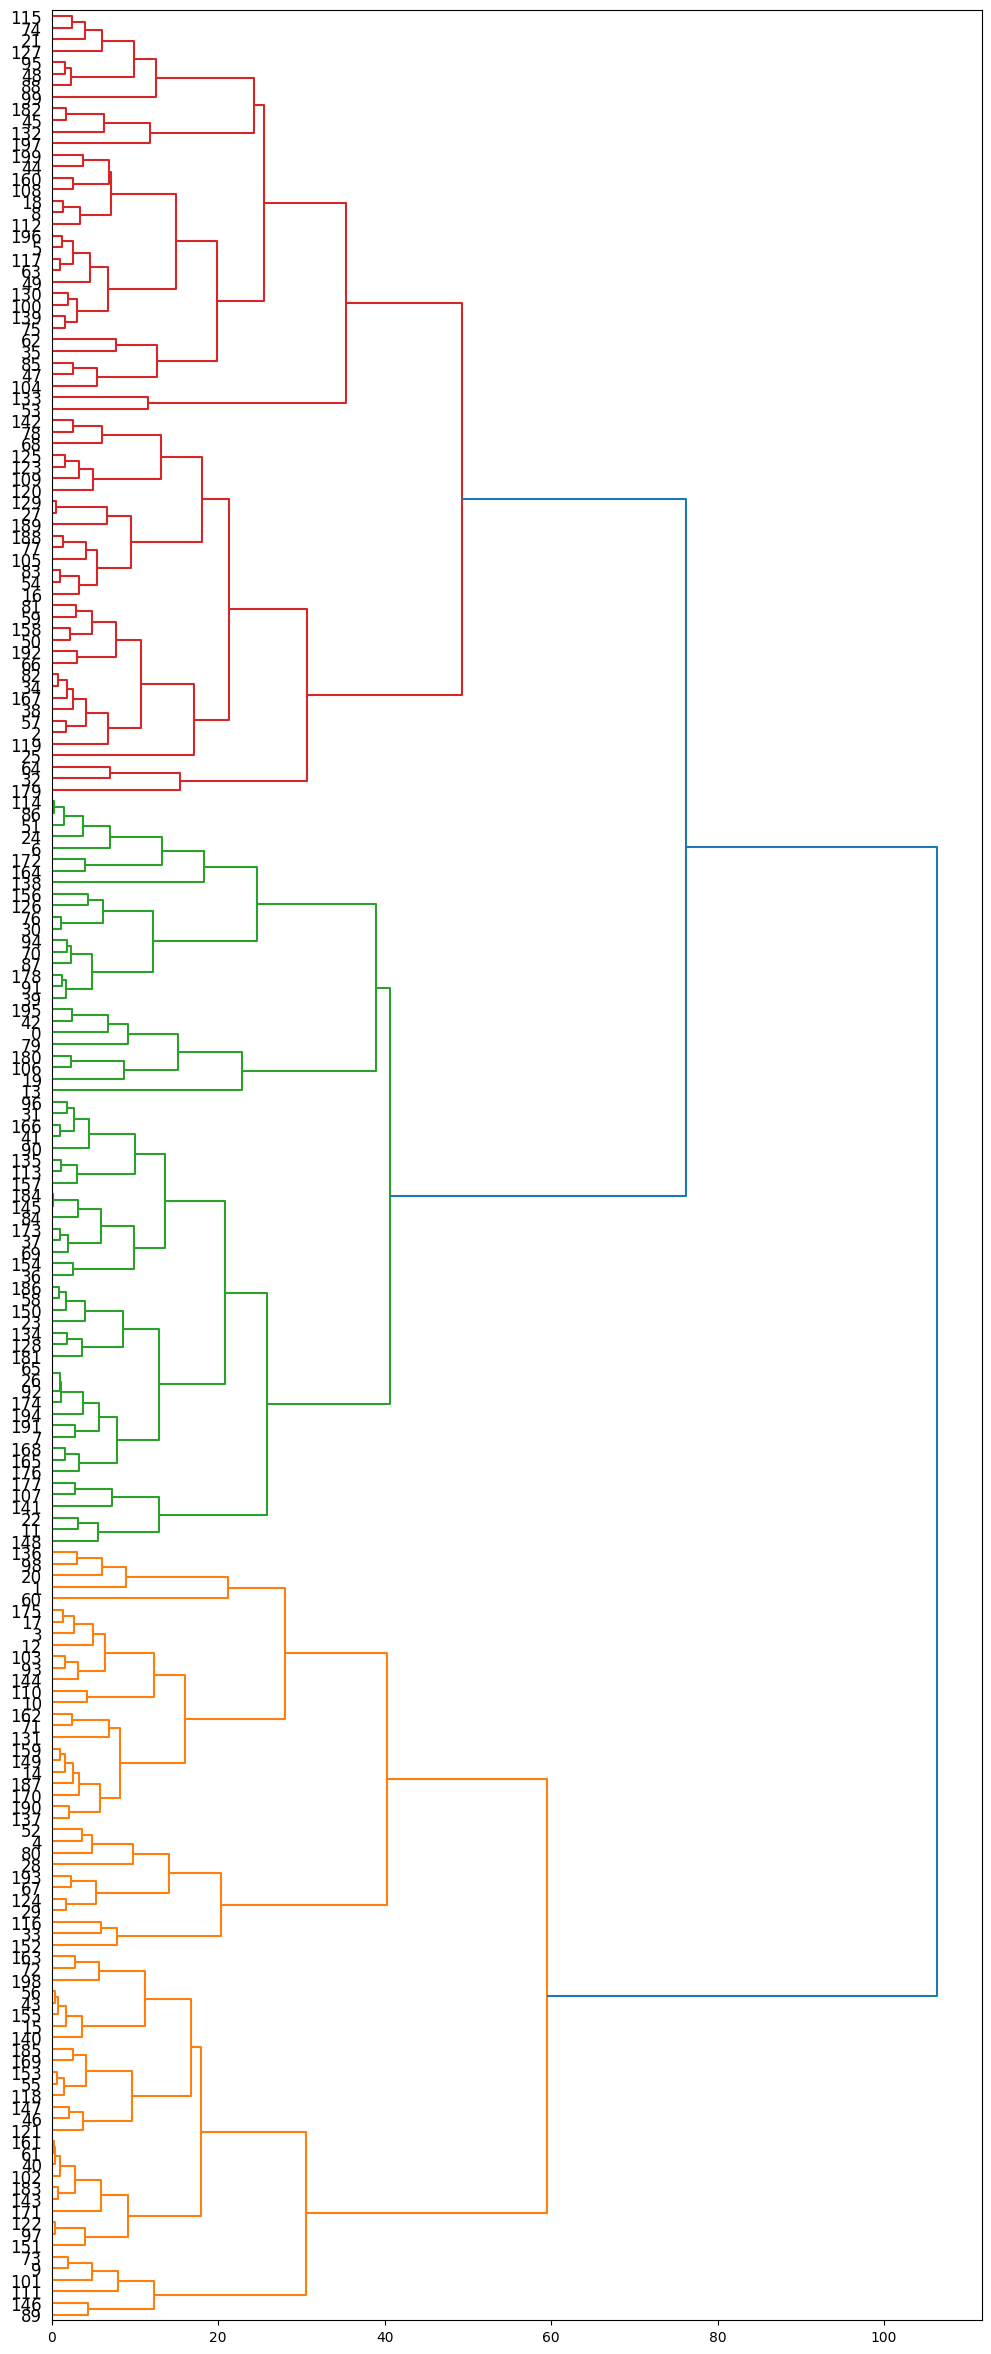

In [20]:
# Requerimientos
import pandas as pd
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
# Matriz de distancias
dist = distance_matrix(X, X)
# Estructur adel dendograma
Z = hierarchy.linkage(dist, 'complete')
# Dibujamos
plt.figure(figsize=(12, 30))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

Como podemos observar, aquí no aparece elelemento centroide asociado al algoritmo; esto es debido a que el funcionamiento de éste, como ya comentamos, es radicalemnte diferente. 

Para tener una mejor comprensión de en qué escenarios los parámetros anteriores pueden tener un protagonismo determinante en el resultado, adjuntamos el excelente ejemplo de la [documentación de sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-py):

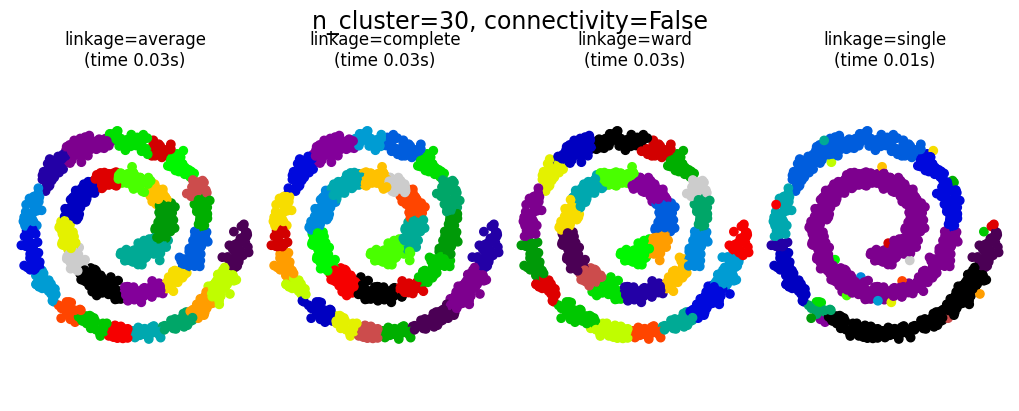

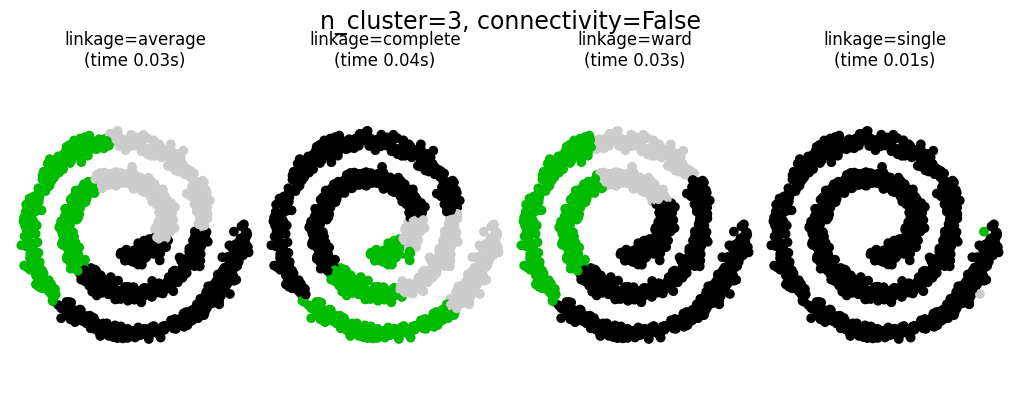

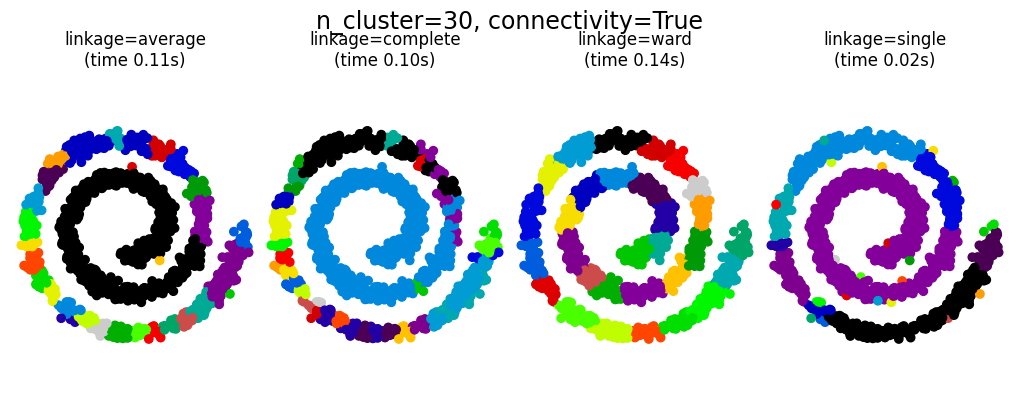

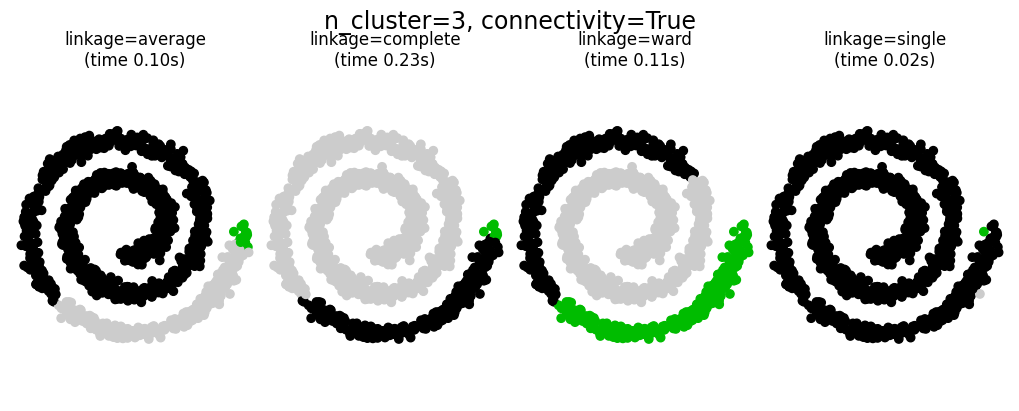

In [21]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()

## Gaussian Mixture Models

Esta familia de algoritmos se basan en realizar agrupaciones de nuestros datos en términos de la **densidad** de puntos, no de una métrica concreta. A fin de entender el más sutil y complejo funcionamiento de estos algoritmos, ejemplificaremos el funcionamiento de sus parámetros con varios ejemplos:

### Inicialización de parámetros

Automatically created module for IPython interactive environment


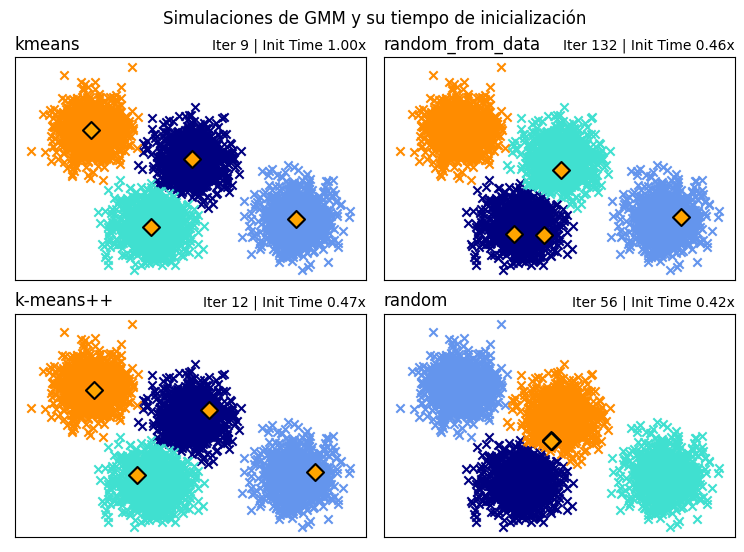

In [22]:
# Author: Gordon Walsh <gordon.p.walsh@gmail.com>
# Data generation code from Jake Vanderplas <vanderplas@astro.washington.edu>

from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms
from timeit import default_timer as timer

print(__doc__)

# Generación de datos
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)

# Método auxiliar para ajusta rla inicialización de parámetros
def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initalization means
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_

# Métodos a probar
methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

# Marco en el que incluir las gráficas
plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

# Bucle para probar todos los escenarios
for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("Simulaciones de GMM y su tiempo de inicialización")
plt.show()

### Covarianzas

Intuitivamente, este parámetro hace reflejo de la *forma* que tendrán los grupos

C:\Users\User\AppData\Local\Temp\ipykernel_13912\984930836.py:27: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
C:\Users\User\AppData\Local\Temp\ipykernel_13912\984930836.py:27: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
C:\Users\User\AppData\Local\Temp\ipykernel_13912\984930836.py:27: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
C:\Users\User\AppData\Local\Temp\ipykernel_13912\984930836.py:27: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is dep

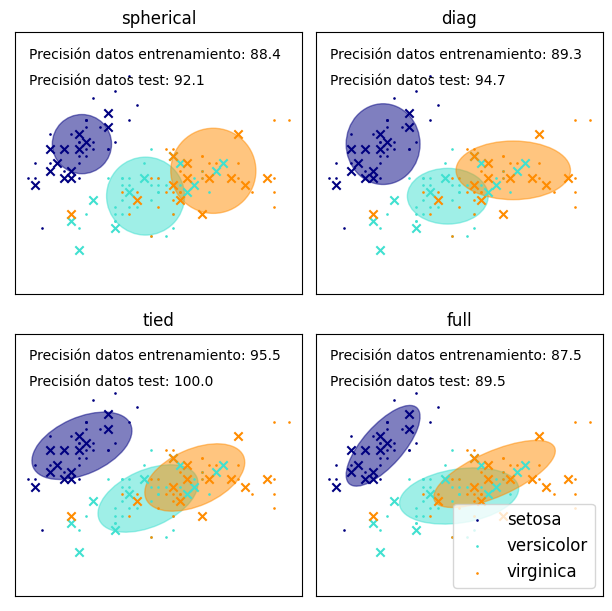

In [23]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# HAcemos carpetas de nuestros datos de tamaño 75-25
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Simulamos GMM con distintos criterios de covarianza
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Puesto que ya tenemos etiquetas para los datos de entrenamiento,
    # inicializamos de forma supervisada los parámetros del algoritmo
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Entrenamos el resto de parámetros usando Expectation Maximization
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Dibujamos
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Precisión datos entrenamiento: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Precisión datos test: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

### Regiones de confianza

Uno de los aspectos más importantes del enfoque bayesiano de este algoritmo es el poder dar una estimación de la región donde estarían los puntos que potencialmente pertenecerían a los grupos de cada clase. Veamos cómo hacerlo:

C:\Users\User\AppData\Local\Temp\ipykernel_13912\2998467694.py:25: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
C:\Users\User\AppData\Local\Temp\ipykernel_13912\2998467694.py:25: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)


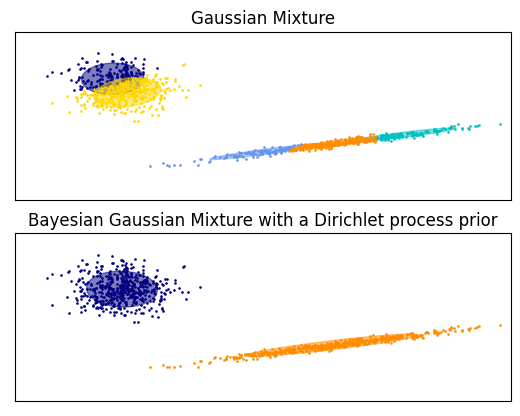

In [24]:
# Requerimientos
import itertools
from scipy import linalg
from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

# Método auxiliar pra dibujar resultados
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Número de muestras por componente
n_samples = 500

# Generamos muestra aleatoria de dos componentes
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

# Entrenamos una GMM
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# Entrenamos una GMM con enfoque bayesiano
dpgmm = mixture.BayesianGaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()

https://www.jcchouinard.com/pca-with-python/